In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 읽어오기

In [108]:
df = pd.read_csv(r'C:\Users\kowm6\OneDrive\바탕 화면\titanic.csv')

# 전체적인 데이터 살펴보기
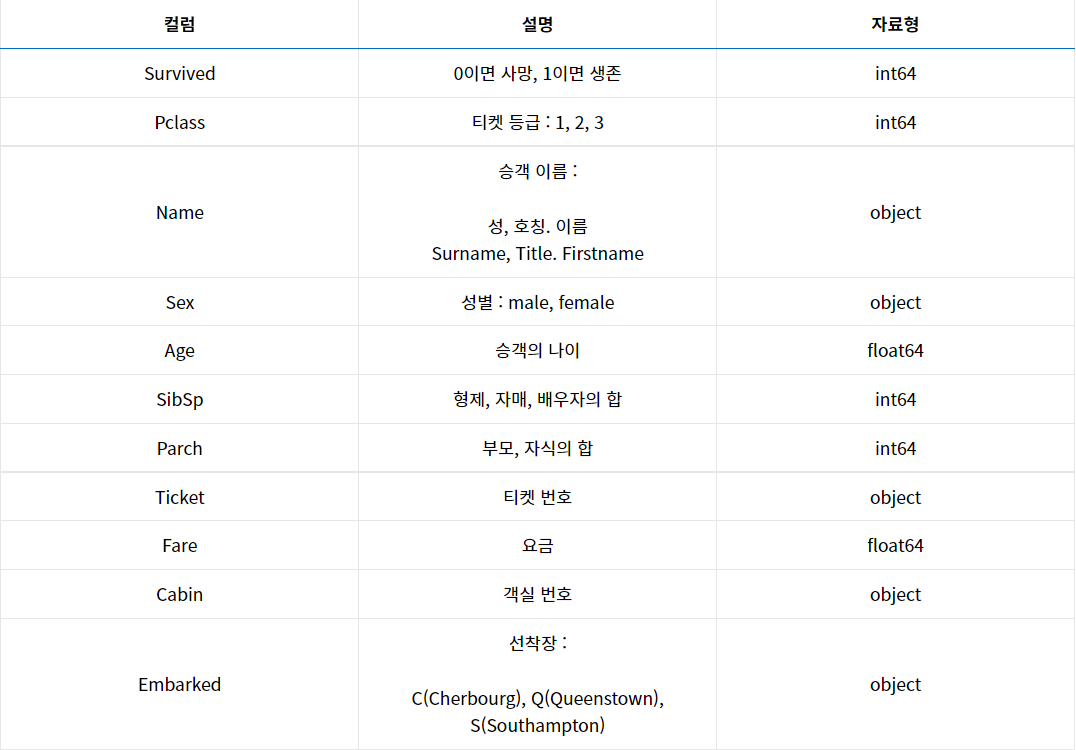

In [109]:
df.shape

(1309, 11)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1034 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [111]:
df.dtypes

pclass        int64
survived      int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [112]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,NaN,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


In [113]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S


# NaN 결측치 확인 및 평균 값으로 채우기

In [114]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          275
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [115]:
#age 열의 첫 10개 데이터 출력 (2행 Nan 값)
print(df['age'].head(10))

0    29.0
1     NaN
2     2.0
3    30.0
4    25.0
5    48.0
6    63.0
7    39.0
8    53.0
9    71.0
Name: age, dtype: float64


In [116]:
# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
mean_age = df['age'].mean(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
print("평균:", mean_age)
print('\n')
df['age'].fillna(mean_age, inplace=True)

평균: 30.22001934235977




In [117]:
print(df['age'].head(10)) # nan 평균 값으로 대체

0    29.000000
1    30.220019
2     2.000000
3    30.000000
4    25.000000
5    48.000000
6    63.000000
7    39.000000
8    53.000000
9    71.000000
Name: age, dtype: float64


In [118]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [123]:
most_freq = df['embarked'].value_counts(dropna=True).idxmax()   
print(most_freq)

S


In [126]:
df['embarked'].fillna(most_freq, inplace=True)

In [127]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       0
dtype: int64

# 데이터 통계정보 확인

In [128]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,30.220019,0.498854,0.385027,33.295479
std,0.837836,0.486055,12.572305,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,30.220019,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


# 이상치 확인

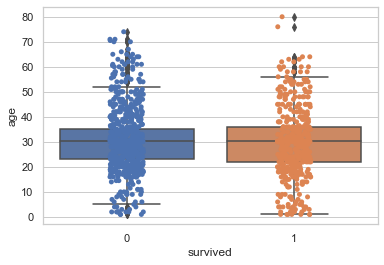

In [178]:
sns.set_style('whitegrid')

ax = sns.boxplot(x='survived', y = 'age', data=df)
ax = sns.stripplot(x='survived', y = 'age', data=df)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='age', ylabel='fare'>

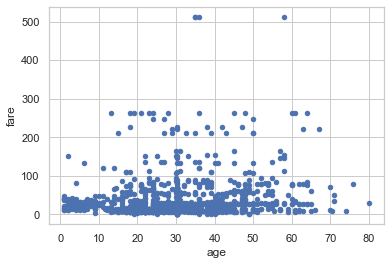

In [181]:
ageandfare = df[['age','fare']]
ageandfare.plot.scatter(x = 'age', y = 'fare')

# 성별에 따른 생존율

In [133]:
df.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='survived'>

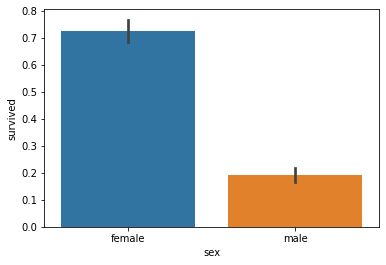

In [135]:
sns.barplot(x = 'sex', y ='survived', data = df)

# 빈부격차에 따른 생존율

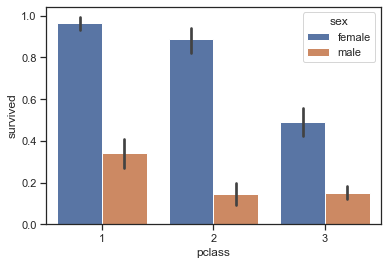

In [167]:
df2 = sns.barplot(x='pclass', y='survived', hue = 'sex', data=df)

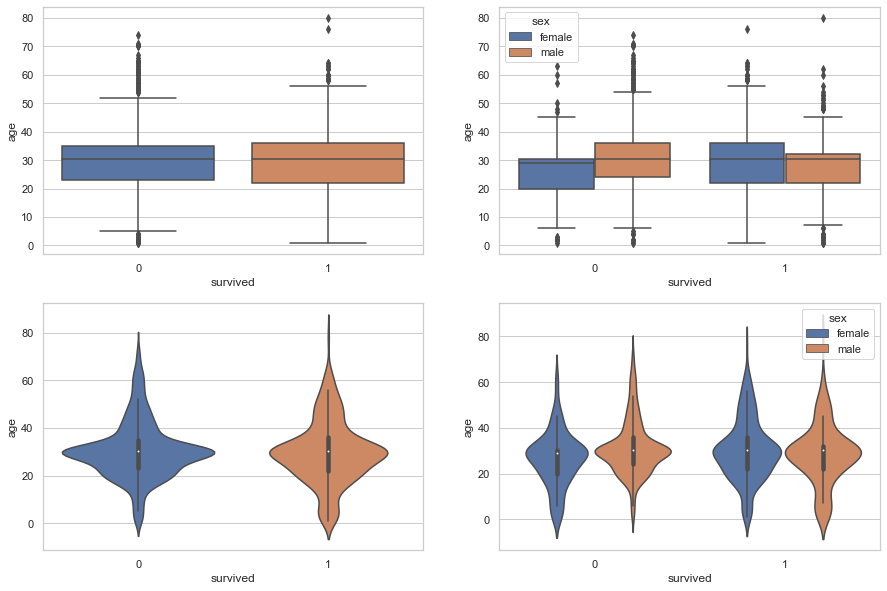

In [192]:
sns.set_style('whitegrid')

titanic = df

# 그래프 객체 생성 (figure에 4개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 10))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
 
# 박스 그래프 - 기본값
sns.boxplot(x='survived', y='age', data=titanic, ax=ax1) 

# 바이올린 그래프 - hue 변수 추가
sns.boxplot(x='survived', y='age', hue='sex', data=titanic, ax=ax2) 

# 박스 그래프 - 기본값
sns.violinplot(x='survived', y='age', data=titanic, ax=ax3) 

# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='survived', y='age', hue='sex', data=titanic, ax=ax4) 

plt.show()

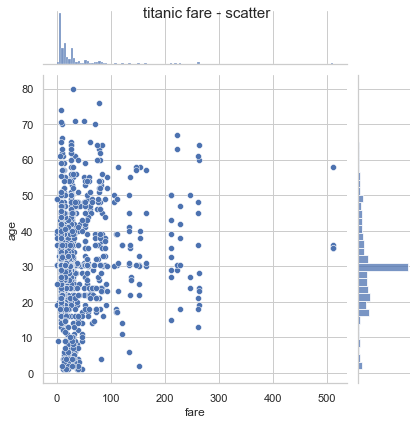

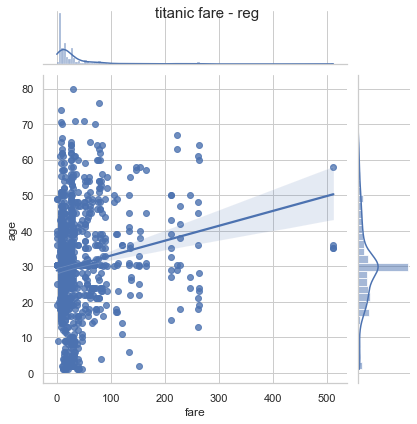

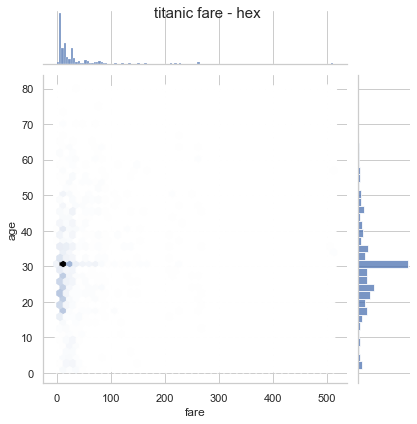

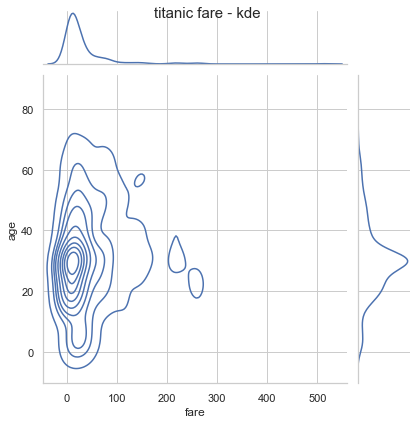

In [188]:
sns.set_style('whitegrid')

titanic = df
# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic) 

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic) 

# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic) 

# 조인트 그래프 - 커럴 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic) 


j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

# 상관관계

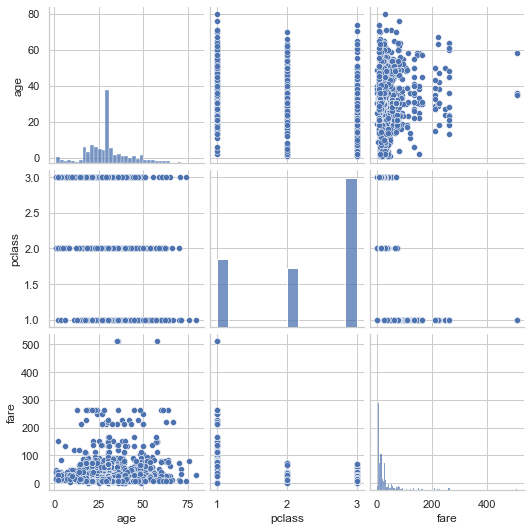

In [185]:
sns.set_style('whitegrid')

# titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = df[['age','pclass', 'fare']]

# 조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)

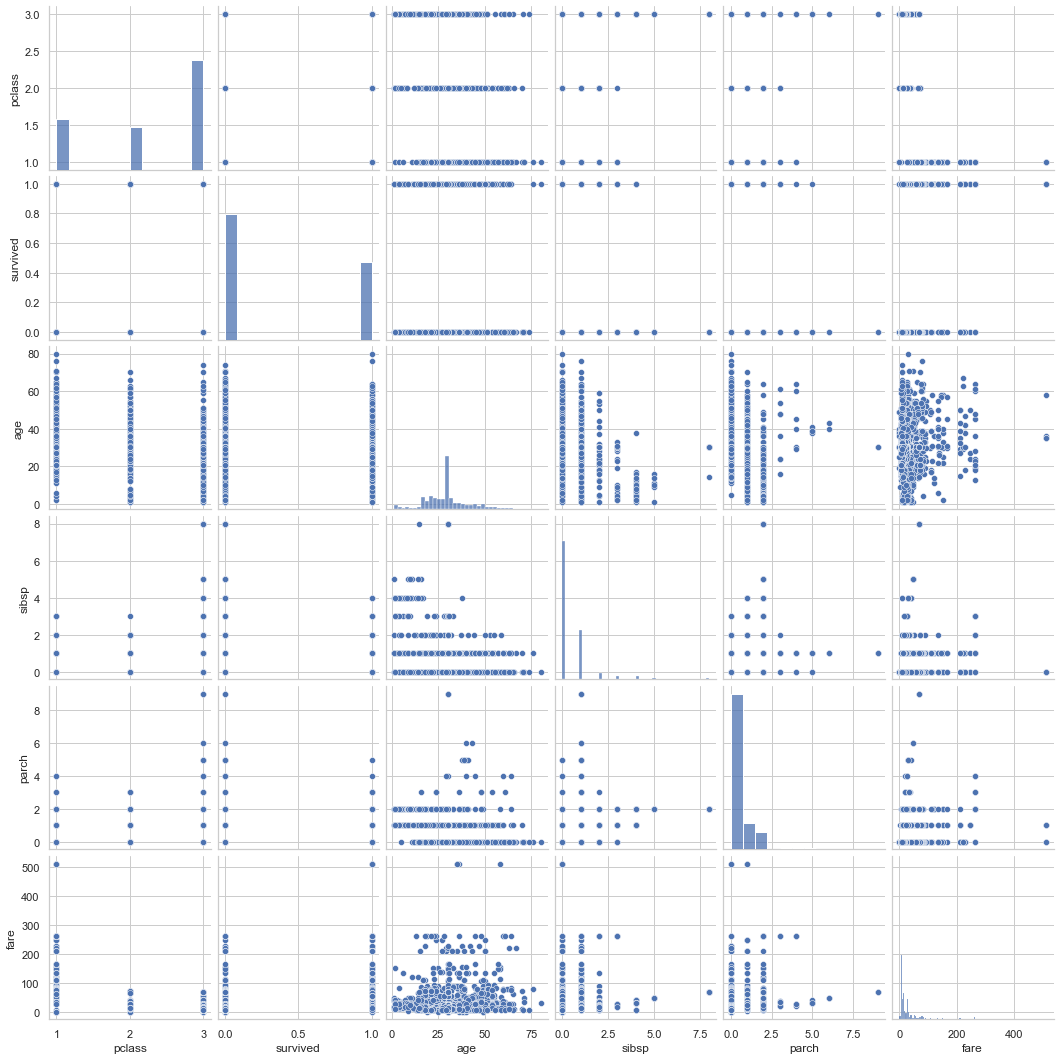

In [193]:
import seaborn as sns
# sns.set_theme(style='ticks')
sns.pairplot(df)

# 성별과 나이 클래스를 이용한 EDA

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [64]:
data=pd.read_csv(r"C:\Users\kowm6\OneDrive\바탕 화면\titanic.csv")

data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,NaN,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


In [28]:
data.isnull().sum() #결측값 확인

pclass         0
survived       0
name           0
sex            0
age          275
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [66]:
# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
mean_age = data['age'].mean(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
print("평균:", mean_age)
print('\n')
data['age'].fillna(mean_age, inplace=True)

print(data['age'].head(10)) # nan 평균 값으로 대체

data.isnull().sum()

평균: 30.22001934235999


0    29.000000
1    30.220019
2     2.000000
3    30.000000
4    25.000000
5    48.000000
6    63.000000
7    39.000000
8    53.000000
9    71.000000
Name: age, dtype: float64


pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

# matplotlib을 이용하여 생존자의 수 확인

survived 1이 생존자를 표시 / 38.2%가 생존 

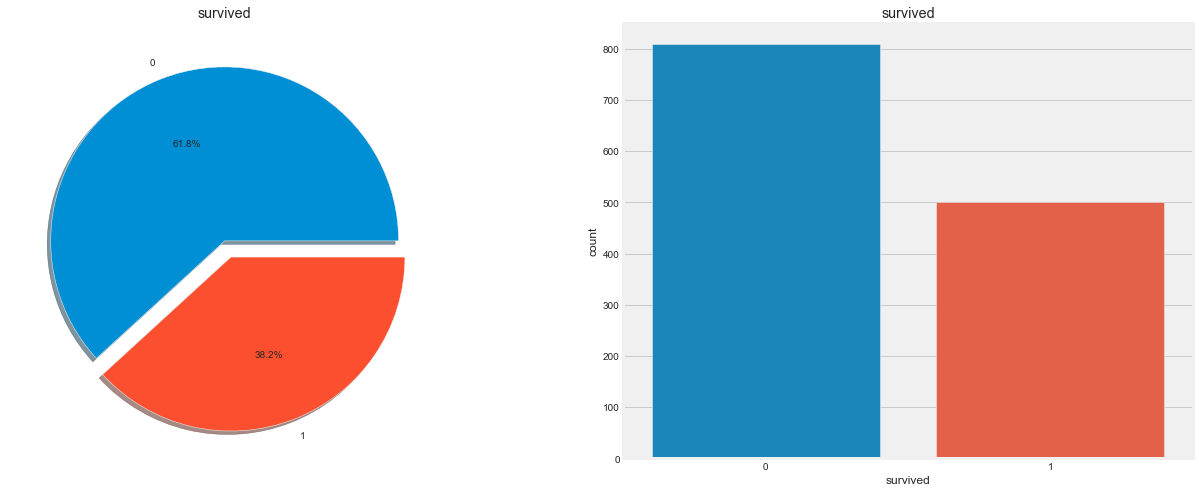

In [29]:
f,ax = plt.subplots(1,2,figsize=(20,8))
data['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True) # autopct 파이조각 전체 분의 백분율
ax[0].set_title('survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=data,ax=ax[1])
ax[1].set_title('survived')
plt.show()

groupby를 이용하여 성별과 생존자 확인

In [31]:
data.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

여성 생존자 339
여성 사망자 127

남성 생존자 161
남성 사망자 682

<function matplotlib.pyplot.show(close=None, block=None)>

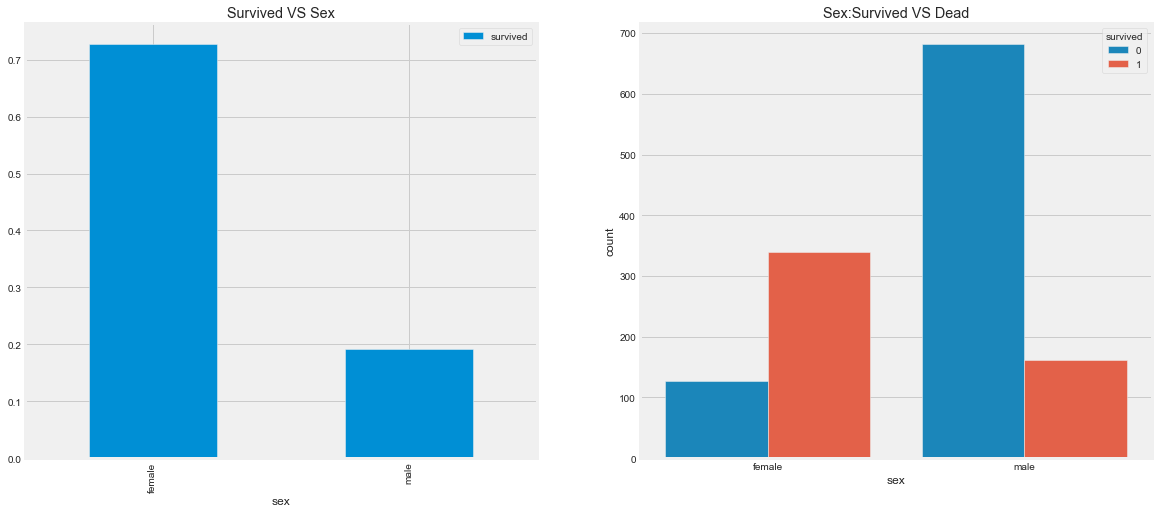

In [33]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['sex','survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS Sex')
sns.countplot('sex',hue='survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived VS Dead')
plt.show

Crosstab 는 범주형 변수를 기준으로 개수 파악 
또는 수치형 데이터를 넣어 계산할 때 사용한다.

예제 : https://freedata.tistory.com/60

In [60]:
pd.crosstab(data.pclass,data.survived,margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


객실별 생존자 그래프

객실별로 3등급 승객이 많았으나 객실별 생존자는 1등급이 제일 많은걸 볼 수 있다.
반대로 3등급 객실이 사망자가 제일 많았다.


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

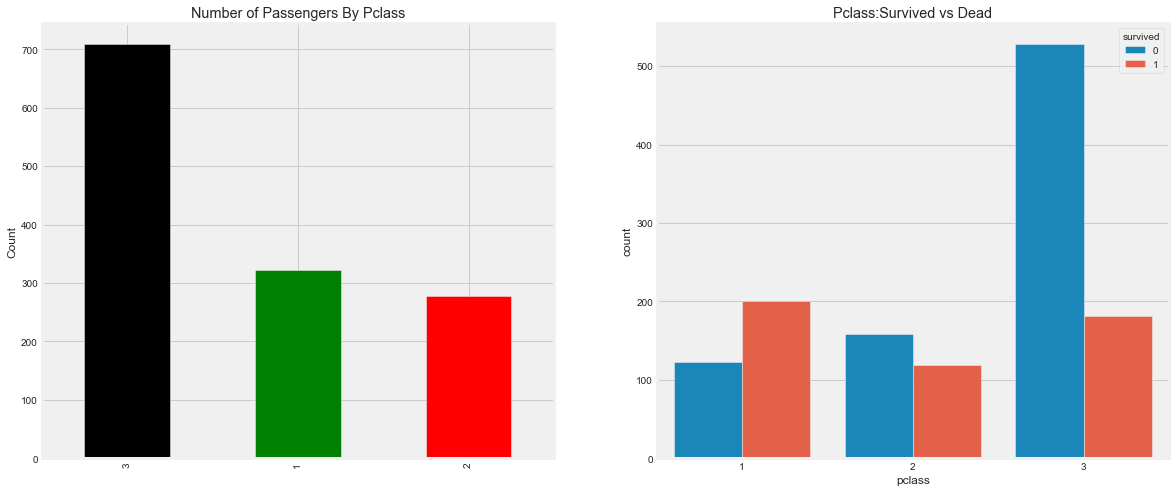

In [37]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['pclass'].value_counts().plot.bar(color=['black','green','red'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('pclass',hue='survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

Crosstab을 이용하여 객실과 생존자 수를 확인

In [39]:
pd.crosstab([data.sex,data.survived],data.pclass,margins=True).style.background_gradient(cmap='summer_r')

factorplot 시각화를 이용하여 1등급 객실을 승선한 여성의 생존율이
높은걸 알 수 있다.

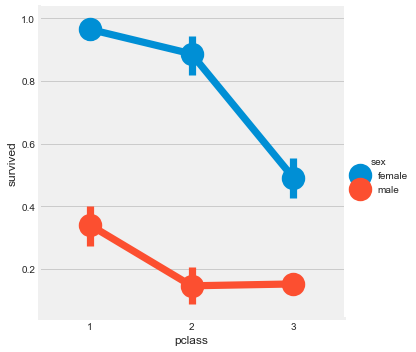

In [41]:
sns.factorplot('pclass','survived',hue='sex',data=data)

승객들의 나이를 확인

In [67]:
print('가장 나이 많은 승객은 :',data['age'].max(),'살')
print('가장 나이 적은 승객은 :',data['age'].min(),'살')
print('승객의 평균 나이는 :',data['age'].mean(),'살')

가장 나이 많은 승객은 : 80.0 살
가장 나이 적은 승객은 : 1.0 살
승객의 평균 나이는 : 30.22001934235999 살


객실별로 1등급 승객의 30~40대 사이 생존자가 많아 보이며 
그 옆은 30대 남성과 여성의 생존자가 많은 걸 확인할 수 있다.

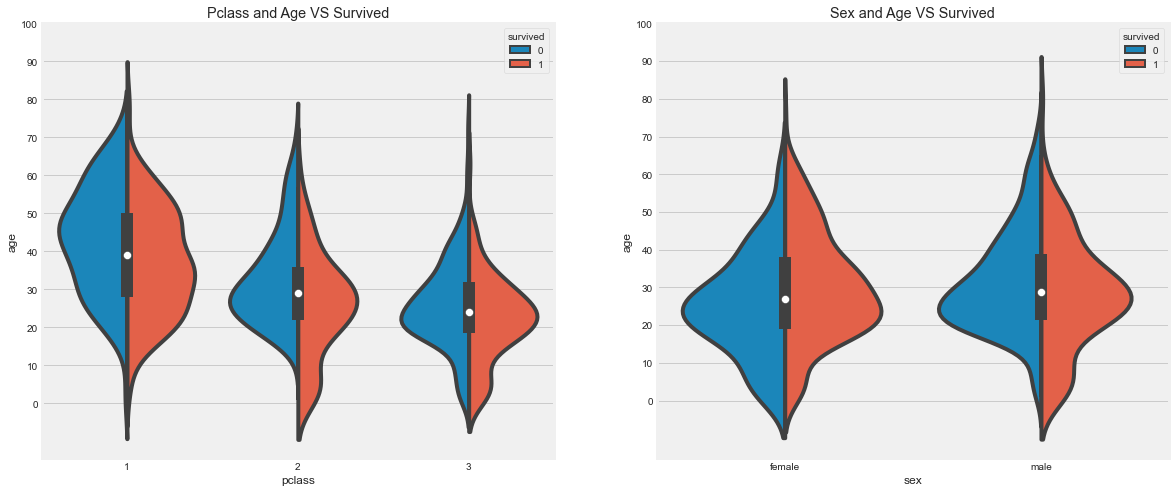

In [45]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("pclass","age",hue="survived",data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("sex","age",hue="survived",data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

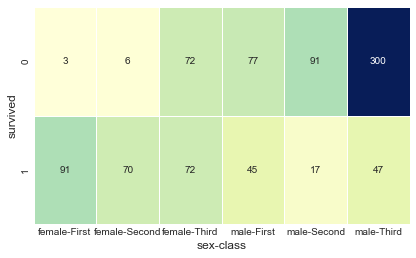

In [68]:
sns.set_style('dark')

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['survived'], columns=['sex','class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='d',    # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False)             # 컬러 바 표시 여부
#            cbar=True)              # 컬러 바 표시 여부

plt.show()